In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from shapely.geometry import Point

In [4]:
df_2020 = pd.read_excel('2020.xlsx',index_col=None)
df_2021 = pd.read_excel('2021.xlsx', index_col=None)
df_2022 = pd.read_excel('2022.xlsx', index_col=None)
df_2020.drop('Unnamed: 0', axis=1, inplace=True)
#df_2021.drop('Unnamed: 0', axis=1, inplace=True)
#df_2022.drop('Unnamed: 0', axis=1, inplace=True)


In [5]:
df = pd.concat([df_2021, df_2022], axis=0)

In [7]:
df

,TEMPORADA,FECHA,FAX,Semana,Mes,HORA,Hora2,FICHA,COMUNA,AREA,...,CUMPLE RAZ LIQ CON,CUMPLE SUP FINAL,LANZAMIENTOS,SUP,RENDIMIENTO LINEA,CUMPLE RENDIMIENTO LINEA,PROM INICIO COMBATE HELITRANS,CUMPLE INICIO R24 HELITRANS,MIN ARRIBO ZONA CONFLICTO,APOYO POLICIAL
0,2020,2019-07-12,F20-01,28.0,7.0,16:53:55,16.0,217010003,San Javier,POCILLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,2019-08-10,F20-01,32.0,8.0,16:39:11,16.0,217010006,Pemuco,CABRERO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2019-08-31,F20-01,35.0,8.0,13:51:46,13.0,217010012,San Javier,POCILLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,2019-09-02,F20-01,36.0,9.0,14:25:22,14.0,217010016,Tomé,TOME,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,2019-09-03,F20-01,36.0,9.0,11:48:16,11.0,217010020,Tomé,TOME,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2022,NaN,NaN,NaN,NaN,NaN,NaN,222015055,COELEMU,NaN,...,SI,SI,NaN,5000m2,0.83,NO,NaN,NaN,NaN,NO
1823,2022,NaN,NaN,NaN,NaN,NaN,NaN,222015075,ROMERAL,NaN,...,NO,SI,NaN,1000m2,0.31,NO,14.0,NO,NaN,NO
1824,2022,NaN,NaN,NaN,NaN,NaN,NaN,222015082,LOS ALAMOS,NaN,...,NO,SI,NaN,5000m2,0.85,NO,NaN,NaN,NaN,NO
1825,2022,NaN,NaN,NaN,NaN,NaN,NaN,222015132,LOS LAGOS,NaN,...,NO,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO


<Figure size 1200x600 with 0 Axes>

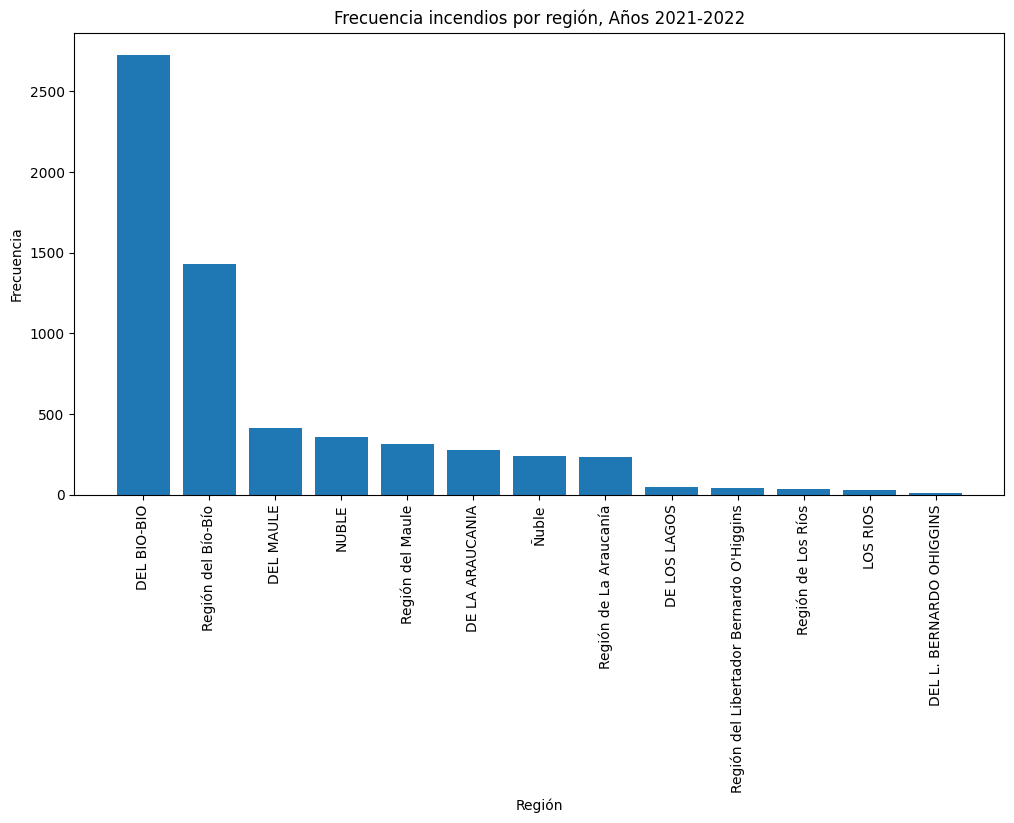

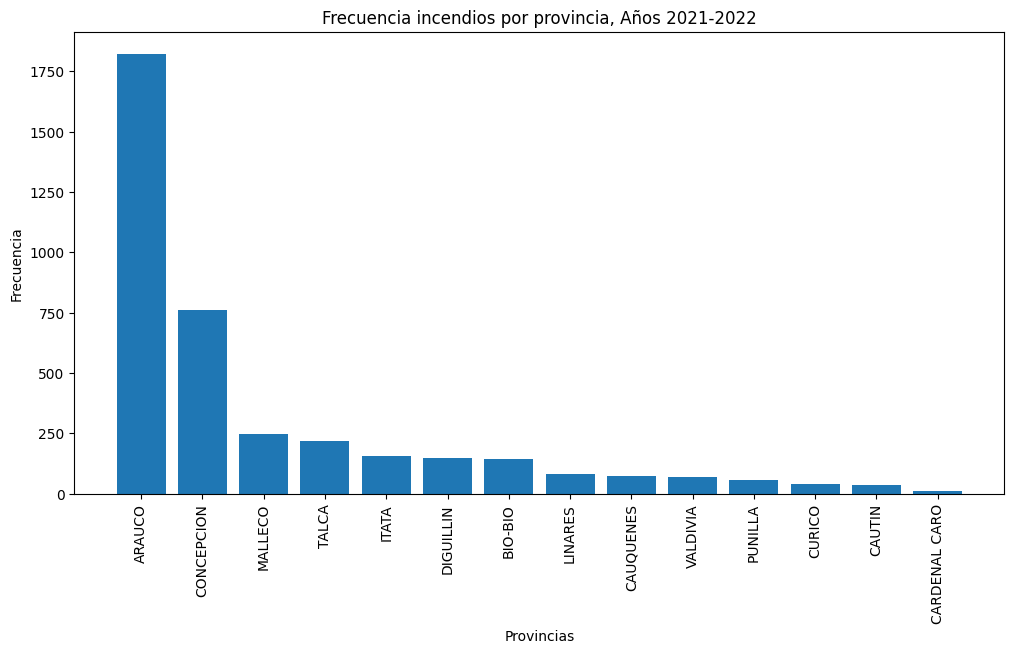

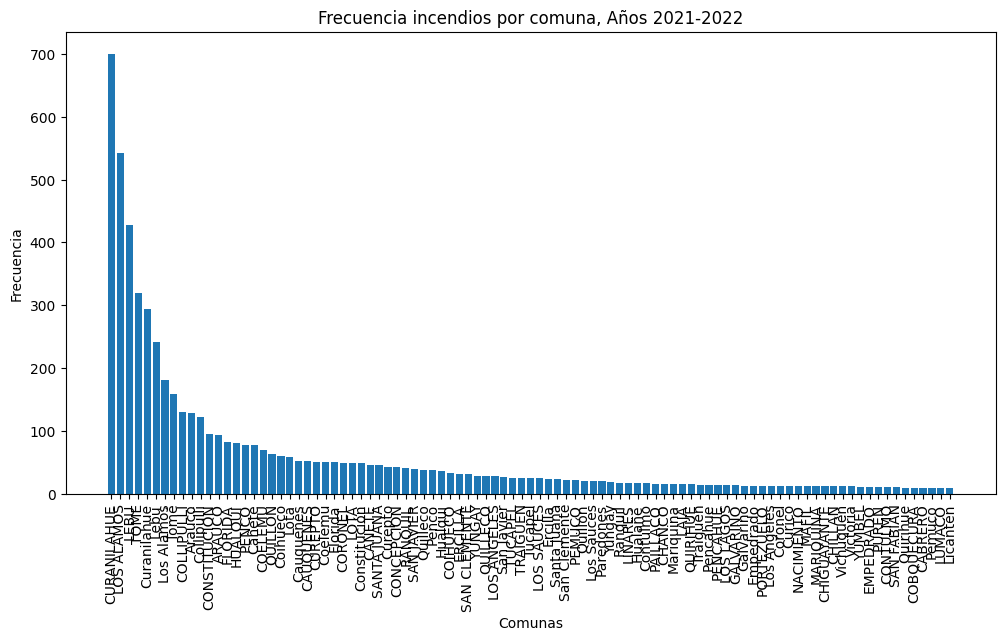

In [9]:
plt.figure(figsize=(12, 6)) 


# Regiones con mas incendios
freq = df['REGION'].value_counts()
umbral_minimo = 10
freq = freq[freq >= umbral_minimo]

plt.figure(figsize=(12, 6))  

plt.bar(freq.index, freq.values)
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.title('Frecuencia incendios por región, Años 2021-2022')
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x para mayor legibilidad
plt.show()

# Provincias con mas incendios
freq = df['PROVINCIA'].value_counts()
umbral_minimo = 10
freq = freq[freq >= umbral_minimo]

plt.figure(figsize=(12, 6)) 

plt.bar(freq.index, freq.values)
plt.xlabel('Provincias')
plt.ylabel('Frecuencia')
plt.title('Frecuencia incendios por provincia, Años 2021-2022')
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x para mayor legibilidad
plt.show()

# Comunas con mas incendios
freq = df['COMUNA'].value_counts()
umbral_minimo = 10
freq = freq[freq >= umbral_minimo]

plt.figure(figsize=(12, 6)) 

plt.bar(freq.index, freq.values)
plt.xlabel('Comunas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia incendios por comuna, Años 2021-2022')
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x para mayor legibilidad
plt.show()

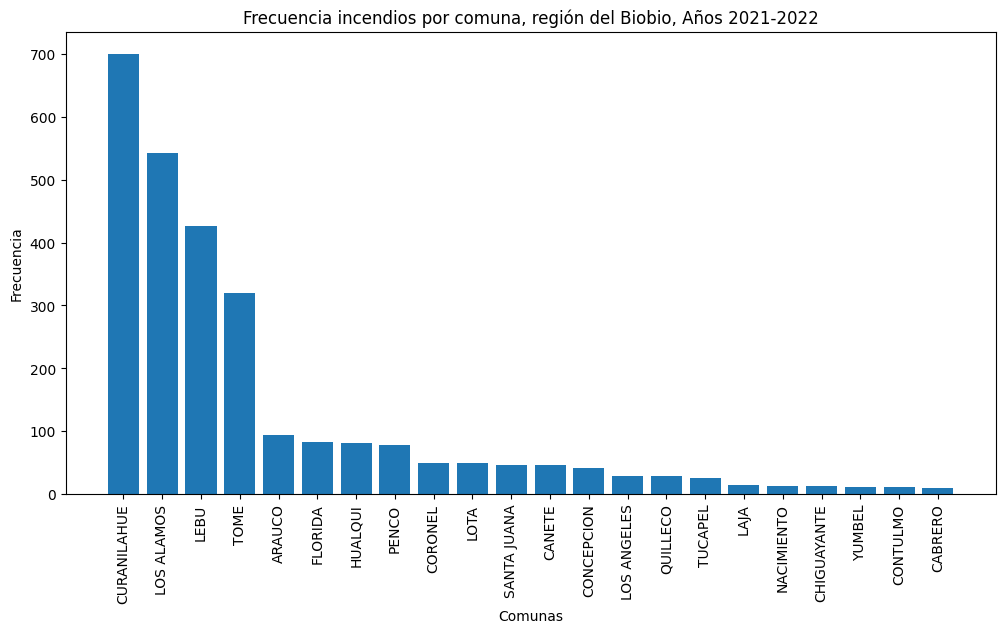

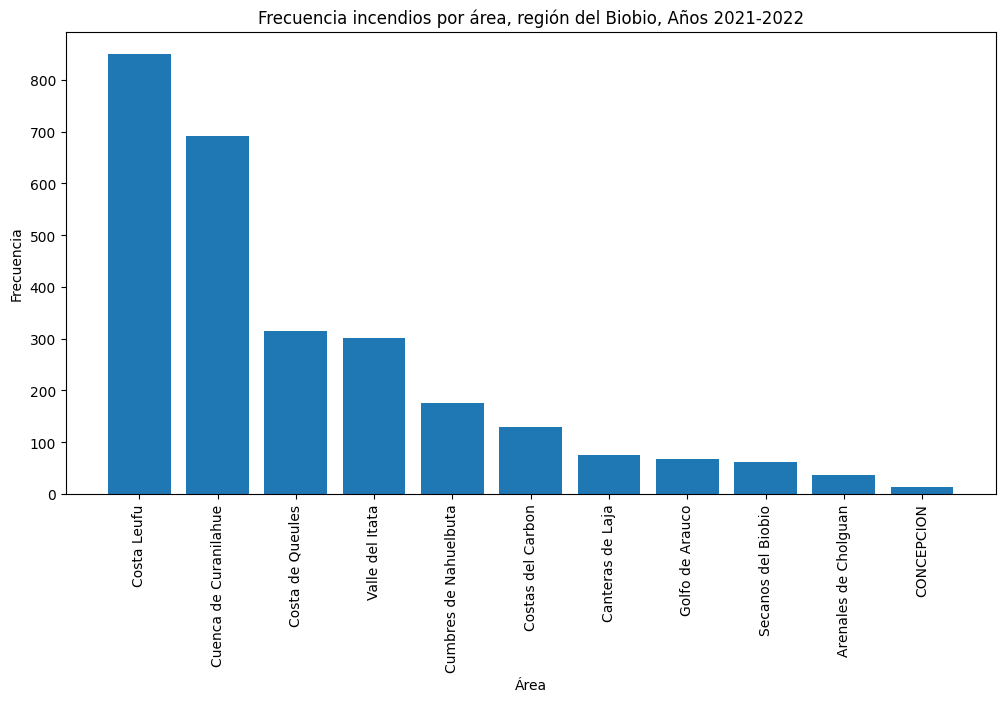

In [9]:
# Concentrarse en la Región del Biobio

df_biobio = df[df['REGION'] == "DEL BIO-BIO"]


# Comunas con mas incendios
freq = df_biobio['COMUNA'].value_counts()
umbral_minimo = 10
freq = freq[freq >= umbral_minimo]

plt.figure(figsize=(12, 6)) 

plt.bar(freq.index, freq.values)
plt.xlabel('Comunas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia incendios por comuna, región del Biobio, Años 2021-2022')
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x para mayor legibilidad
plt.show()

# Areas con mas incendios

freq = df_biobio['AREA'].value_counts()
umbral_minimo = 10
freq = freq[freq >= umbral_minimo]

plt.figure(figsize=(12, 6)) 

plt.bar(freq.index, freq.values)
plt.xlabel('Área')
plt.ylabel('Frecuencia')
plt.title('Frecuencia incendios por área, región del Biobio, Años 2021-2022')
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x para mayor legibilidad
plt.show()

C:\Users\simon\AppData\Local\Temp\ipykernel_11332\3368944639.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entero_biobio['COMUNA'] = df_entero_biobio['COMUNA'].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


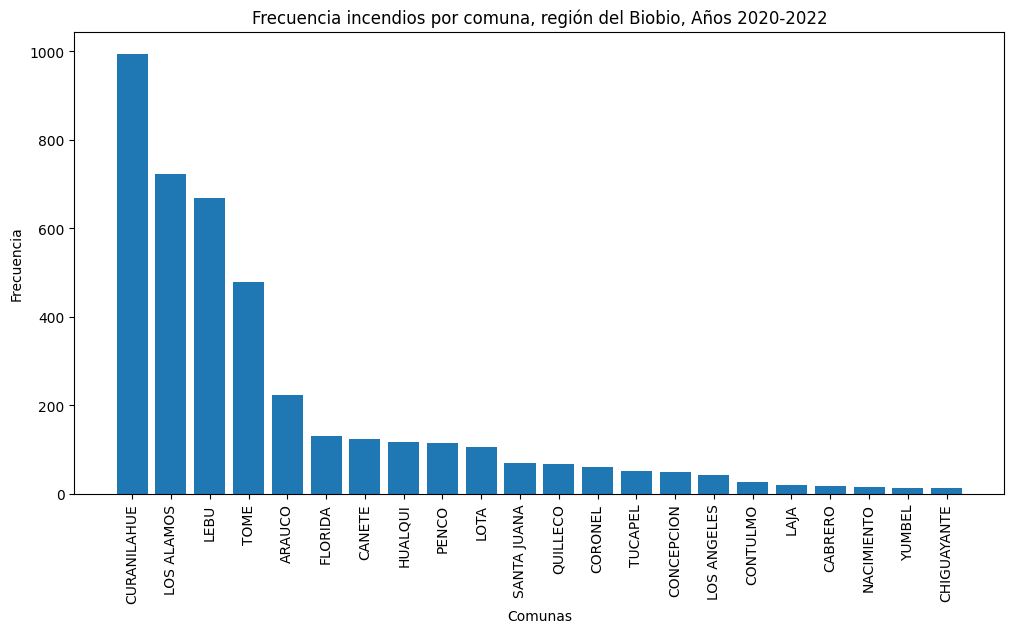

In [29]:
df_all = pd.concat([df_2020,df_2021, df_2022], axis=0)
testing = df_all.copy()

testing["REGION"] = testing['REGION'].replace("Región del Bío-Bío","DEL BIO-BIO").str.upper()
#freq_testing = testing["REGION"].value_counts() 
#freq_testing = freq_testing[freq_testing >= 0]
#plt.figure(figsize=(12, 6))  

#plt.bar(freq_testing.index, freq_testing.values)
#plt.xlabel('Región')
#plt.ylabel('Frecuencia')
#plt.title('Frecuencia incendios por región, Años 2020-2022')
#plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x para mayor legibilidad
#plt.show()
#df_biobio2 = testing[testing['REGION'] == "DEL BIO-BIO"]


df_entero_biobio=testing[testing["REGION"] == "DEL BIO-BIO"]
df_entero_biobio['COMUNA'] = df_entero_biobio['COMUNA'].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
freq_total = df_entero_biobio['COMUNA'].value_counts()
umbral_minimo = 10
freq_total = freq_total[freq_total >= umbral_minimo]

plt.figure(figsize=(12, 6)) 

plt.bar(freq_total.index, freq_total.values)
plt.xlabel('Comunas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia incendios por comuna, región del Biobio, Años 2020-2022')
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x para mayor legibilidad
plt.show()



TypeError: 'float' object cannot be interpreted as an integer

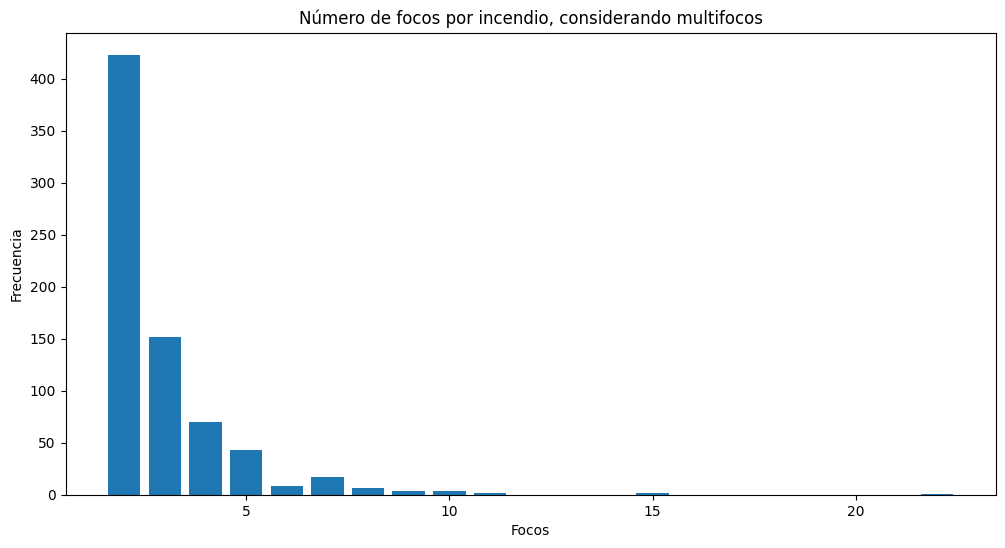

In [10]:
focos =  df[df['MULTIFOCO'] == 'SI']

focos = focos['FOCOS'].value_counts()

umbral_maximo = 1000000
focos = focos[focos <= umbral_maximo]

plt.figure(figsize=(12, 6)) 

plt.bar(focos.index, focos.values)

# Añade etiquetas y título
plt.xlabel('Focos')
plt.ylabel('Frecuencia')
plt.title('Número de focos por incendio, considerando multifocos')
plt.xticks(list(range((max(focos.index)+1))))

# Muestra el gráfico
plt.show()

In [11]:
df["MULTIFOCO"].value_counts()

MULTIFOCO
NO    4984
SI    1176
Name: count, dtype: int64

In [12]:
df["DANO PLANTAC"].value_counts()

DANO PLANTAC
NO    3731
SI     134
Name: count, dtype: int64

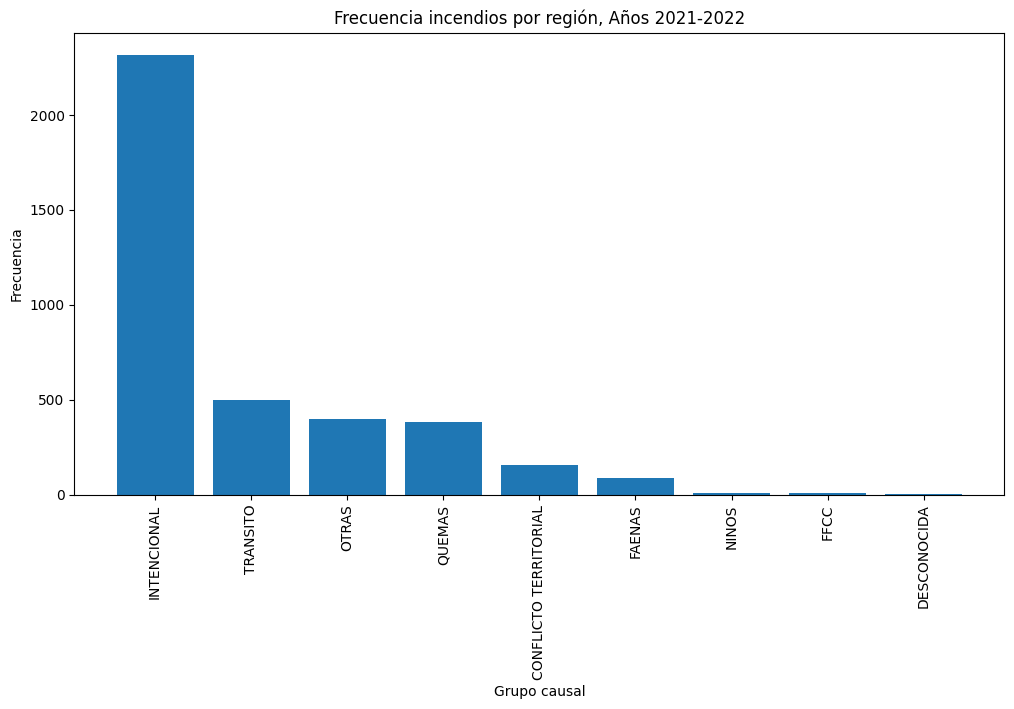

In [13]:
# Grupo causal

freq = df['GRUPO CAUSAL'].value_counts()
#umbral_minimo = 10
#freq = freq[freq >= umbral_minimo]

plt.figure(figsize=(12, 6))  

plt.bar(freq.index, freq.values)
plt.xlabel('Grupo causal')
plt.ylabel('Frecuencia')
plt.title('Frecuencia incendios por región, Años 2021-2022')
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x para mayor legibilidad
plt.show()


In [15]:
# Supongamos que tienes un DataFrame llamado df con columnas 'latitud' y 'longitud'

df2 = df[df['LATITUD'] != -85.522789599693]

geometry = [Point(xy) for xy in zip(df2['LONGITUD'], df2['LATITUD'])]
crs = {'init': 'epsg:4326'}  # WGS84 (sistema de coordenadas utilizado para latitud y longitud)

gdf = gpd.GeoDataFrame(df2, crs=crs, geometry=geometry)


C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [14]:
# Por ejemplo, carga límites de un país (sustituye 'nombre_pais' con el nombre correcto)
chile_regions = gpd.read_file('Comunas\\comunas.shp')

lat_min, lat_max = -30, -40  # Límites de latitud para Chile
lon_min, lon_max = -75, -66  # Límites de longitud para Chile




DriverError: Comunas\comunas.shp: No such file or directory

In [16]:
# Filtra los datos para mostrar solo la región de interés
filtered_data = chile_regions.cx[lon_min:lon_max, lat_min:lat_max]

# Dibuja el mapa acotado
ax = filtered_data.plot(figsize=(10, 10))

# Superpone tus datos
gdf.plot(ax=plt.gca(), marker='o', color='red', markersize=5)

# Añade etiquetas y título
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicación Georreferencial')

# Muestra el gráfico
plt.show()


NameError: name 'chile_regions' is not defined